In [5]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Lecture 9 ##

## Visualization Review: Sleep Study ##

In [6]:
sleep = Table.read_table('../Datasets/SleepStudy.csv')
sleep.show(5)

Gender,ClassYear,LarkOwl,NumEarlyClass,EarlyClass,GPA,ClassesMissed,CognitionZscore,PoorSleepQuality,DepressionScore,AnxietyScore,StressScore,DepressionStatus,AnxietyStatus,Stress,DASScore,Happiness,AlcoholUse,Drinks,WeekdayBed,WeekdayRise,WeekdaySleep,WeekendBed,WeekendRise,WeekendSleep,AverageSleep,AllNighter
0,4,Neither,0,0,3.6,0,-0.26,4,4,3,8,normal,normal,normal,15,28,Moderate,10,25.75,8.7,7.7,25.75,9.5,5.88,7.18,0
0,4,Neither,2,1,3.24,0,1.39,6,1,0,3,normal,normal,normal,4,25,Moderate,6,25.7,8.2,6.8,26,10,7.25,6.93,0
0,4,Owl,0,0,2.97,12,0.38,18,18,18,9,moderate,severe,normal,45,17,Light,3,27.44,6.55,3,28,12.59,10.09,5.02,0
0,1,Lark,5,1,3.76,0,1.39,9,1,4,6,normal,normal,normal,11,32,Light,2,23.5,7.17,6.77,27,8,7.25,6.9,0
0,4,Owl,0,0,3.2,4,1.22,9,7,25,14,normal,severe,normal,46,15,Moderate,4,25.9,8.67,6.09,23.75,9.5,7,6.35,0


### Scatter Plots

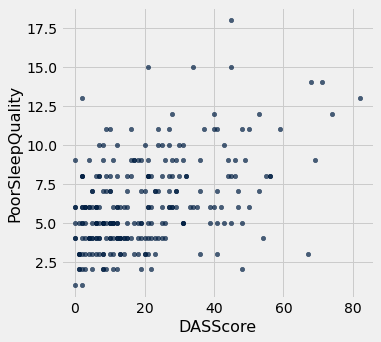

In [7]:
sleep.scatter('DASScore', 'PoorSleepQuality')

### Bar Charts

In [8]:
AnxietyStatus = sleep.group('AnxietyStatus')
AnxietyStatus

AnxietyStatus,count
moderate,56
normal,181
severe,16


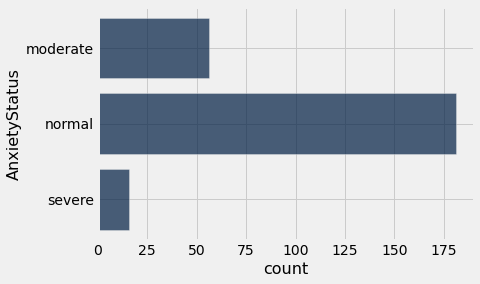

In [9]:
AnxietyStatus.barh('AnxietyStatus')

### Histograms

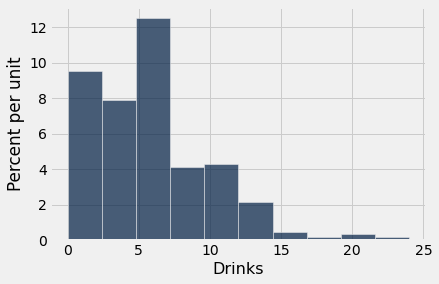

In [10]:
sleep.hist('Drinks')

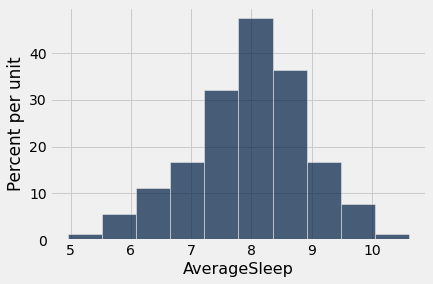

In [11]:
sleep.hist('AverageSleep')

In [12]:
min(sleep.column('AverageSleep')), max(sleep.column('AverageSleep'))

(4.95, 10.62)

In [13]:
sleep_bins = np.arange(4,11,0.5)

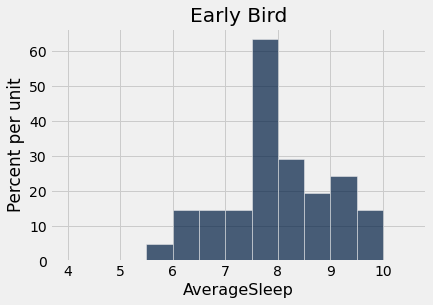

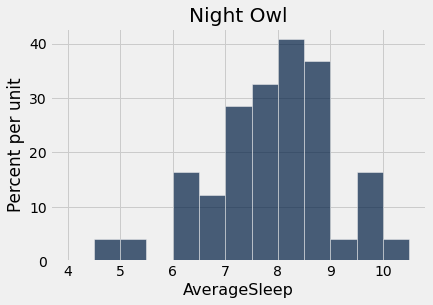

In [14]:
LarkSleep = sleep.where('LarkOwl', are.containing('Lark'))
LarkSleep.hist('AverageSleep', bins=sleep_bins)
plots.title('Early Bird');

OwlSleep = sleep.where('LarkOwl', are.containing('Owl'))
OwlSleep.hist('AverageSleep', bins=sleep_bins)
plots.title('Night Owl');

## Functions ##

In [15]:
max(5, 6, 7)

7

In [16]:
def triple(x):
    return 3 * x

In [17]:
triple(3)

9

In [18]:
num = 4

In [19]:
triple(num)

12

In [20]:
triple(num * 5)

60

### Note About Scopes

In [ ]:
def multiple_of_y(x):
    y = 5
    return y * x

In [ ]:
multiple_of_y(10)

In [ ]:
def multiple_of_y(x):
    y = 10
    return y * x

In [ ]:
multiple_of_y(10)

In [ ]:
y

### Type Agnostic

In [ ]:
triple('ha')

In [ ]:
triple(np.arange(10))

### Questions

In [ ]:
def f(s):
    return np.round(s / sum(s) * 100, 2)

In [ ]:
f(5)

In [ ]:
f(5.0)

In [ ]:
f('boo')

In [ ]:
my_new_array = np.arange(5)
f(my_new_array)

In [ ]:
my_newer_array = np.arange(0, 100, 3)
my_newer_array

f(my_newer_array)

In [ ]:
def percent_of_whole(s):
    return np.round(s / sum(s) * 100, 2)

In [ ]:
percent_of_whole(my_new_array)

## Apply ##

In [ ]:
My_States = Table().with_columns(
    'State', make_array('CT', 'CA', 'NY'),
    'Year Last Lived', make_array(2010, 2016, 2018)
)
My_States

In [ ]:
def how_long_since_left(x):
    return 2021 - x

In [ ]:
how_long_since_left(2010)

In [ ]:
how_long_since_left(2016)

In [ ]:
My_States.apply(how_long_since_left, 'Year Last Lived')

In [ ]:
sleep.show(5)

In [ ]:
def Calculate_DAS(Stress, Anxiety, Depression):
    return sum(make_array(Stress, Anxiety, Depression))

In [ ]:
Calculate_DAS(4, 3, 8)

In [ ]:
Calculate_DAS(
    sleep.column('StressScore').item(0),
    sleep.column('AnxietyScore').item(0),
    sleep.column('DepressionScore').item(0)
)

In [ ]:
sleep.apply(Calculate_DAS, 'StressScore', 'AnxietyScore', 'DepressionScore')

In [ ]:
sleep = sleep.with_column(
    'DAS Calculation', sleep.apply(Calculate_DAS, 'StressScore', 'AnxietyScore', 'DepressionScore')
)

sleep

In [ ]:
sleep.select('DASScore', 'DAS Calculation')